<a href="https://colab.research.google.com/github/nhosamani/Machine_Learning/blob/main/Diabetes_Data_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('/content/Diabetes_Data.csv')

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
df['Outcome'].unique()

array([1, 0])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=df.drop(columns='Outcome',axis=1).values
y=df['Outcome'].values

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [29]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.fit(X_test)



In [30]:
from sklearn.neighbors import KNeighborsClassifier 
KNN=KNeighborsClassifier(n_neighbors=8)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [31]:
y_predict=KNN.predict(X_test)

In [32]:
from sklearn.metrics import classification_report as cr
cr(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85       107\n           1       0.67      0.55      0.60        47\n\n    accuracy                           0.78       154\n   macro avg       0.74      0.72      0.73       154\nweighted avg       0.77      0.78      0.77       154\n'

In [33]:
neighbor=np.arange(1,9)
train_acc=np.empty(len(neighbor))
test_acc=np.empty(len(neighbor))

In [34]:
train_acc
test_acc

array([0.0e+000, 4.9e-324, 9.9e-324, 1.5e-323, 2.0e-323, 0.0e+000,
       4.9e-324, 2.5e-323])

In [35]:
for i,j in enumerate(neighbor):
  KNN=KNeighborsClassifier(n_neighbors=j)
  KNN.fit(X_train,y_train)

  train_acc[i]=KNN.score(X_train,y_train)
  test_acc[i]=KNN.score(X_test,y_test)

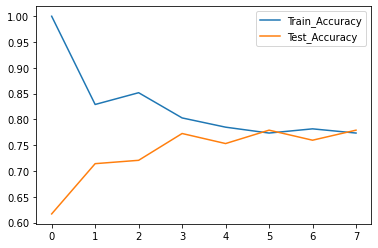

In [36]:
from prompt_toolkit.widgets.base import Label
plt.plot(train_acc,label='Train_Accuracy')
plt.plot(test_acc,label='Test_Accuracy')

plt.legend()
#plt.xlabel('Neigbhors')
plt.show()

In [37]:
KNN.score(X_train,y_train)

0.7736156351791531

In [38]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict,y_test)

array([[94, 21],
       [13, 26]])